In [39]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [47]:
df_hermes = pd.read_csv('results/hermes_py_000/hsiue_et_al_H2_sat_mut-hermes_py_000-use_mt_structure=0.csv')
df_proteinmpnn = pd.read_csv('results/proteinmpnn_v_48_002/zero_shot_predictions/hsiue_et_al_H2_sat_mut-num_seq_per_target=10-use_mt_structure=0.csv')
df_blosum = pd.read_csv('results/blosum62__0__sum/hsiue_et_al_H2_sat_mut-blosum62__0__sum-use_mt_structure=0.csv')

target_col = 'IFN_gamma (pg/ml)'
hermes_pred_col = 'pnE'
proteinmpnn_pred_col = 'pnlogp'
blosum_pred_col = 'substitution_matrix_score'

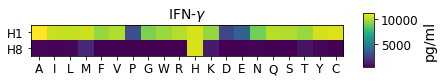

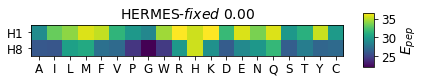

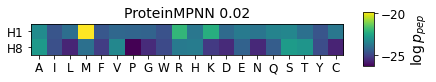

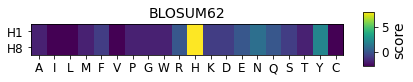

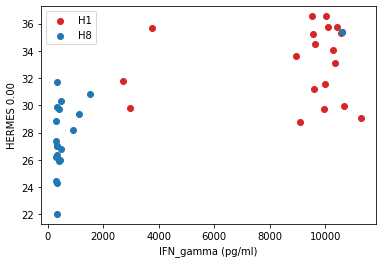

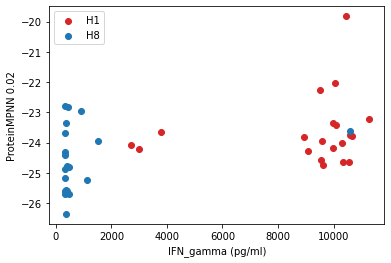

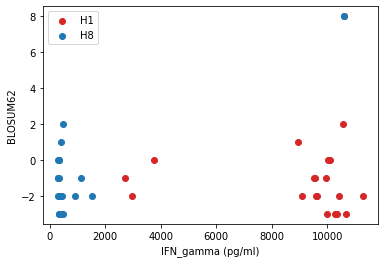

In [48]:
# isolate rows where mutant starts with H

fontsize = 14

df_hermes_H1 = df_hermes[df_hermes['mutant'].str.startswith('H1')]
df_hermes_H8 = df_hermes[df_hermes['mutant'].str.startswith('H8')]

df_proteinmpnn_H1 = df_proteinmpnn[df_proteinmpnn['mutant'].str.startswith('H1')]
df_proteinmpnn_H8 = df_proteinmpnn[df_proteinmpnn['mutant'].str.startswith('H8')]

df_blosum_H1 = df_blosum[df_blosum['mutant'].str.startswith('H1')]
df_blosum_H8 = df_blosum[df_blosum['mutant'].str.startswith('H8')]

mutants = [x[-1] for x in df_hermes_H1['mutant'].values]
assert mutants == [x[-1] for x in df_hermes_H8['mutant'].values]
assert mutants == [x[-1] for x in df_proteinmpnn_H1['mutant'].values]
assert mutants == [x[-1] for x in df_proteinmpnn_H8['mutant'].values]
assert mutants == [x[-1] for x in df_blosum_H1['mutant'].values]
assert mutants == [x[-1] for x in df_blosum_H8['mutant'].values]

target_values = np.zeros((2, 20))
target_values[0, :] = df_hermes_H1[target_col].values
target_values[1, :] = df_hermes_H8[target_col].values
fig = plt.figure(figsize=(7, 2))
im = plt.imshow(target_values)
plt.xticks(range(20), mutants, fontsize=fontsize-2)
plt.yticks(range(2), ['H1', 'H8'], fontsize=fontsize-2)
plt.title('IFN-$\gamma$', fontsize=fontsize)

cbar = fig.colorbar(im, ax=plt.gca(), shrink=0.5, aspect=5)  # Adjust shrink and aspect for sizing
cbar.set_label('pg/ml', fontsize=fontsize)
cbar.ax.tick_params(labelsize=fontsize-2)

plt.savefig('plots/h1_vs_h8__ifn_gamma.png')
plt.savefig('plots/h1_vs_h8__ifn_gamma.pdf')
plt.show()

hermes_pred_values = np.zeros((2, 20))
hermes_pred_values[0, :] = df_hermes_H1[hermes_pred_col].values
hermes_pred_values[1, :] = df_hermes_H8[hermes_pred_col].values
fig = plt.figure(figsize=(7, 2))
im = plt.imshow(hermes_pred_values)
plt.xticks(range(20), mutants, fontsize=fontsize-2)
plt.yticks(range(2), ['H1', 'H8'], fontsize=fontsize-2)
plt.title('HERMES-$fixed$ 0.00', fontsize=fontsize)
``
cbar = fig.colorbar(im, ax=plt.gca(), shrink=0.5, aspect=5)  # Adjust shrink and aspect for sizing
cbar.set_label('$E_{pep}$', fontsize=fontsize)
cbar.ax.tick_params(labelsize=fontsize-2)

plt.savefig('plots/h1_vs_h8__hermes.png')
plt.savefig('plots/h1_vs_h8__hermes.pdf')
plt.show()

proteinmpnn_pred_values = np.zeros((2, 20))
proteinmpnn_pred_values[0, :] = df_proteinmpnn_H1[proteinmpnn_pred_col].values
proteinmpnn_pred_values[1, :] = df_proteinmpnn_H8[proteinmpnn_pred_col].values
fig = plt.figure(figsize=(7, 2))
im = plt.imshow(proteinmpnn_pred_values)
plt.xticks(range(20), mutants, fontsize=fontsize-2)
plt.yticks(range(2), ['H1', 'H8'], fontsize=fontsize-2)
plt.title('ProteinMPNN 0.02', fontsize=fontsize)

cbar = fig.colorbar(im, ax=plt.gca(), shrink=0.5, aspect=5)  # Adjust shrink and aspect for sizing
cbar.set_label('$\log p_{pep}$', fontsize=fontsize)
cbar.ax.tick_params(labelsize=fontsize-2)

plt.savefig('plots/h1_vs_h8__proteinmpnn.png')
plt.savefig('plots/h1_vs_h8__proteinmpnn.pdf')
plt.show()

blosum_pred_values = np.zeros((2, 20))
blosum_pred_values[0, :] = df_blosum_H1[blosum_pred_col].values
blosum_pred_values[1, :] = df_blosum_H8[blosum_pred_col].values
fig = plt.figure(figsize=(7, 2))
im = plt.imshow(blosum_pred_values)
plt.xticks(range(20), mutants, fontsize=fontsize-2)
plt.yticks(range(2), ['H1', 'H8'], fontsize=fontsize-2)
plt.title('BLOSUM62', fontsize=fontsize)

cbar = fig.colorbar(im, ax=plt.gca(), shrink=0.5, aspect=5)  # Adjust shrink and aspect for sizing
cbar.set_label('score', fontsize=fontsize)
cbar.ax.tick_params(labelsize=fontsize-2)

plt.savefig('plots/h1_vs_h8__blosum.png')
plt.savefig('plots/h1_vs_h8__blosum.pdf')
plt.show()

colors = ['tab:red', 'tab:blue']
for i in range(2):
    plt.scatter(target_values[i, :], hermes_pred_values[i, :], color=colors[i], label=['H1', 'H8'][i])
plt.xlabel('IFN_gamma (pg/ml)')
plt.ylabel('HERMES 0.00')
plt.legend()
plt.show()

colors = ['tab:red', 'tab:blue']
for i in range(2):
    plt.scatter(target_values[i, :], proteinmpnn_pred_values[i, :], color=colors[i], label=['H1', 'H8'][i])
plt.xlabel('IFN_gamma (pg/ml)')
plt.ylabel('ProteinMPNN 0.02')
plt.legend()
plt.show()

colors = ['tab:red', 'tab:blue']
for i in range(2):
    plt.scatter(target_values[i, :], blosum_pred_values[i, :], color=colors[i], label=['H1', 'H8'][i])
plt.xlabel('IFN_gamma (pg/ml)')
plt.ylabel('BLOSUM62')
plt.legend()
plt.show()

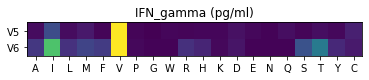

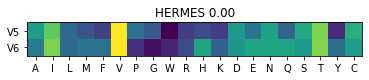

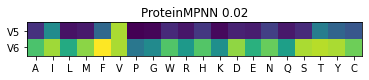

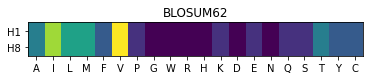

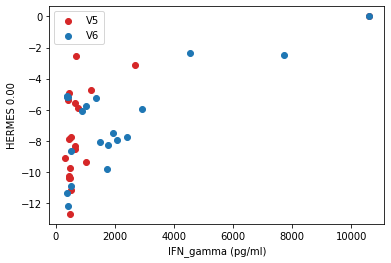

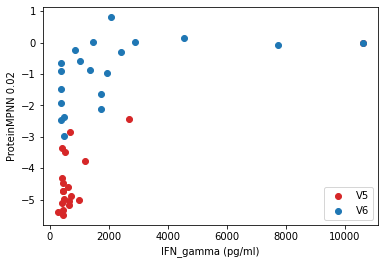

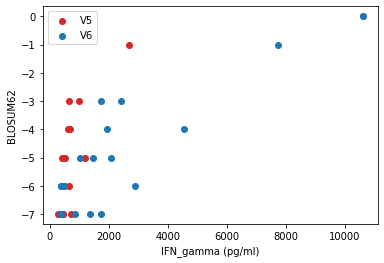

In [40]:
# isolate rows where mutant starts with V

df_hermes_V5 = df_hermes[df_hermes['mutant'].str.startswith('V5')]
df_hermes_V6 = df_hermes[df_hermes['mutant'].str.startswith('V6')]

df_proteinmpnn_V5 = df_proteinmpnn[df_proteinmpnn['mutant'].str.startswith('V5')]
df_proteinmpnn_V6 = df_proteinmpnn[df_proteinmpnn['mutant'].str.startswith('V6')]

df_blosum_V5 = df_blosum[df_blosum['mutant'].str.startswith('V5')]
df_blosum_V6 = df_blosum[df_blosum['mutant'].str.startswith('V6')]

mutants = [x[-1] for x in df_hermes_V5['mutant'].values]
assert mutants == [x[-1] for x in df_hermes_V6['mutant'].values]
assert mutants == [x[-1] for x in df_proteinmpnn_V5['mutant'].values]
assert mutants == [x[-1] for x in df_proteinmpnn_V6['mutant'].values]
assert mutants == [x[-1] for x in df_blosum_V5['mutant'].values]
assert mutants == [x[-1] for x in df_blosum_V6['mutant'].values]

target_values = np.zeros((2, 20))
target_values[0, :] = df_hermes_V5[target_col].values
target_values[1, :] = df_hermes_V6[target_col].values
plt.imshow(target_values)
plt.xticks(range(20), mutants)
plt.yticks(range(2), ['V5', 'V6'])
plt.title('IFN_gamma (pg/ml)')
plt.show()

hermes_pred_values = np.zeros((2, 20))
hermes_pred_values[0, :] = df_hermes_V5[hermes_pred_col].values
hermes_pred_values[1, :] = df_hermes_V6[hermes_pred_col].values
plt.imshow(hermes_pred_values)
plt.xticks(range(20), mutants)
plt.yticks(range(2), ['V5', 'V6'])
plt.title('HERMES 0.00')
plt.show()

proteinmpnn_pred_values = np.zeros((2, 20))
proteinmpnn_pred_values[0, :] = df_proteinmpnn_V5[proteinmpnn_pred_col].values
proteinmpnn_pred_values[1, :] = df_proteinmpnn_V6[proteinmpnn_pred_col].values
plt.imshow(proteinmpnn_pred_values)
plt.xticks(range(20), mutants)
plt.yticks(range(2), ['V5', 'V6'])
plt.title('ProteinMPNN 0.02')
plt.show()

blosum_pred_values = np.zeros((2, 20))
blosum_pred_values[0, :] = df_blosum_V5[blosum_pred_col].values
blosum_pred_values[1, :] = df_blosum_V6[blosum_pred_col].values
plt.imshow(blosum_pred_values)
plt.xticks(range(20), mutants)
plt.yticks(range(2), ['H1', 'H8'])
plt.title('BLOSUM62')
plt.show()

colors = ['tab:red', 'tab:blue']
for i in range(2):
    plt.scatter(target_values[i, :], hermes_pred_values[i, :], color=colors[i], label=['V5', 'V6'][i])
plt.xlabel('IFN_gamma (pg/ml)')
plt.ylabel('HERMES 0.00')
plt.legend()
plt.show()

colors = ['tab:red', 'tab:blue']
for i in range(2):
    plt.scatter(target_values[i, :], proteinmpnn_pred_values[i, :], color=colors[i], label=['V5', 'V6'][i])
plt.xlabel('IFN_gamma (pg/ml)')
plt.ylabel('ProteinMPNN 0.02')
plt.legend()
plt.show()

colors = ['tab:red', 'tab:blue']
for i in range(2):
    plt.scatter(target_values[i, :], blosum_pred_values[i, :], color=colors[i], label=['V5', 'V6'][i])
plt.xlabel('IFN_gamma (pg/ml)')
plt.ylabel('BLOSUM62')
plt.legend()
plt.show()

In [41]:
df_hermes = pd.read_csv('/Users/gianmarcovisani/Desktop/tcr_pmhc/tcr_antigen_design/mutation_effects/mskcc/results/hermes_py_000/mskcc_tcr1_ec50_sat_mut-hermes_py_000-use_mt_structure=0.csv')

df_blosum = pd.read_csv('/Users/gianmarcovisani/Desktop/tcr_pmhc/tcr_antigen_design/mutation_effects/mskcc/results/blosum62__1__mean/mskcc_tcr1_ec50_sat_mut-blosum62__1__mean-use_mt_structure=0.csv')

target_col = '- delta log_ec50_M'
hermes_pred_col = 'log_proba_mt__minus__log_proba_wt'
proteinmpnn_pred_col = 'log_p_mt__minus__log_p_wt'
blosum_pred_col = 'substitution_matrix_score'

'NLVPMVATV'


'NLVPMVATV'

19
19
19


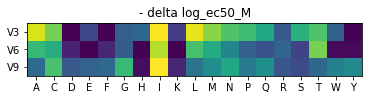

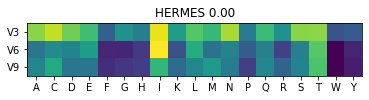

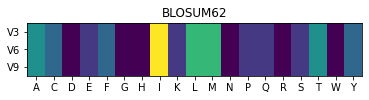

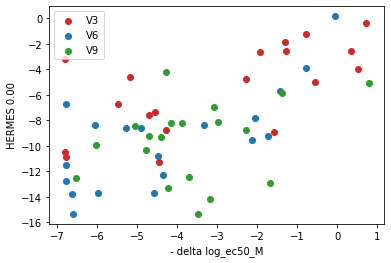

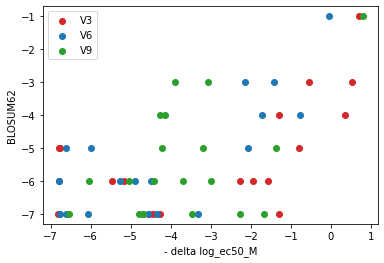

In [42]:
df_hermes_V3 = df_hermes[df_hermes['mutant'].str.startswith('V3')]
df_hermes_V6 = df_hermes[df_hermes['mutant'].str.startswith('V6')]
df_hermes_V9 = df_hermes[df_hermes['mutant'].str.startswith('V9')]

df_blosum_V3 = df_blosum[df_blosum['mutant'].str.startswith('V3')]
df_blosum_V6 = df_blosum[df_blosum['mutant'].str.startswith('V6')]
df_blosum_V9 = df_blosum[df_blosum['mutant'].str.startswith('V9')]

print(len(df_hermes_V3))
print(len(df_hermes_V6))
print(len(df_hermes_V9))

mutants = [x[-1] for x in df_hermes_V3['mutant'].values]
assert mutants == [x[-1] for x in df_hermes_V6['mutant'].values]
assert mutants == [x[-1] for x in df_hermes_V9['mutant'].values]
assert mutants == [x[-1] for x in df_blosum_V3['mutant'].values]
assert mutants == [x[-1] for x in df_blosum_V6['mutant'].values]
assert mutants == [x[-1] for x in df_blosum_V9['mutant'].values]

target_values = np.zeros((3, 19))
target_values[0, :] = df_hermes_V3[target_col].values
target_values[1, :] = df_hermes_V6[target_col].values
target_values[2, :] = df_hermes_V9[target_col].values
plt.imshow(target_values)
plt.xticks(range(19), mutants)
plt.yticks(range(3), ['V3', 'V6', 'V9'])
plt.title('- delta log_ec50_M')
plt.show()

hermes_pred_values = np.zeros((3, 19))
hermes_pred_values[0, :] = df_hermes_V3[hermes_pred_col].values
hermes_pred_values[1, :] = df_hermes_V6[hermes_pred_col].values
hermes_pred_values[2, :] = df_hermes_V9[hermes_pred_col].values
plt.imshow(hermes_pred_values)
plt.xticks(range(19), mutants)
plt.yticks(range(3), ['V3', 'V6', 'V9'])
plt.title('HERMES 0.00')
plt.show()

blosum_pred_values = np.zeros((3, 19))
blosum_pred_values[0, :] = df_blosum_V3[blosum_pred_col].values
blosum_pred_values[1, :] = df_blosum_V6[blosum_pred_col].values
blosum_pred_values[2, :] = df_blosum_V9[blosum_pred_col].values
plt.imshow(blosum_pred_values)
plt.xticks(range(19), mutants)
plt.yticks(range(3), ['V3', 'V6', 'V9'])
plt.title('BLOSUM62')
plt.show()

colors = ['tab:red', 'tab:blue', 'tab:green']
for i in range(3):
    plt.scatter(target_values[i, :], hermes_pred_values[i, :], color=colors[i], label=['V3', 'V6', 'V9'][i])
plt.xlabel('- delta log_ec50_M')
plt.ylabel('HERMES 0.00')
plt.legend()
plt.show()

colors = ['tab:red', 'tab:blue', 'tab:green']
for i in range(3):
    plt.scatter(target_values[i, :], blosum_pred_values[i, :], color=colors[i], label=['V3', 'V6', 'V9'][i])
plt.xlabel('- delta log_ec50_M')
plt.ylabel('BLOSUM62')
plt.legend()
plt.show()


In [26]:
seq = 'MET ALA GLN SER VAL SER GLN HIS ASN HIS HIS VAL ILE          LEU SER GLU ALA ALA SER LEU GLU LEU GLY CYS ASN TYR          SER TYR GLY GLY THR VAL ASN LEU PHE TRP TYR VAL GLN          TYR PRO GLY GLN HIS LEU GLN LEU LEU LEU LYS TYR PHE          SER GLY ASP PRO LEU VAL LYS GLY ILE LYS GLY PHE GLU          ALA GLU PHE ILE LYS SER LYS PHE SER PHE ASN LEU ARG          LYS PRO SER VAL GLN TRP SER ASP THR ALA GLU TYR PHE          CYS ALA VAL ASN ALA ARG ARG ASN THR PRO LEU VAL PHE          GLY LYS GLY THR ARG LEU SER VAL ILE ALA ASN ILE GLN          ASN PRO ASP PRO ALA VAL TYR GLN LEU ARG ASP SER LYS          SER SER ASP LYS SER VAL CYS LEU PHE THR ASP PHE ASP          SER GLN THR ASN VAL SER GLN SER LYS ASP SER ASP VAL          TYR ILE THR ASP LYS CYS VAL LEU ASP MET ARG SER MET          ASP PHE LYS SER ASN SER ALA VAL ALA TRP SER ASN LYS          SER ASP PHE ALA CYS ALA ASN ALA PHE ASN ASN SER ILE          ILE PRO GLU ASP THR PHE PHE PRO SER PRO GLU SER SER          MET ILE GLN ARG THR PRO LYS ILE GLN VAL TYR SER ARG          HIS PRO ALA GLU ASN GLY LYS SER ASN PHE LEU ASN CYS          TYR VAL SER GLY PHE HIS PRO SER ASP ILE GLU VAL ASP          LEU LEU LYS ASN GLY GLU ARG ILE GLU LYS VAL GLU HIS          SER ASP LEU SER PHE SER LYS ASP TRP SER PHE TYR LEU          LEU TYR TYR THR GLU PHE THR PRO THR GLU LYS ASP GLU          TYR ALA CYS ARG VAL ASN HIS VAL THR LEU SER GLN PRO          LYS ILE VAL LYS TRP ASP ARG ASP MET'

three_letter_to_one_letter = {
    'ALA': 'A',
    'ARG': 'R',
    'ASN': 'N',
    'ASP': 'D',
    'CYS': 'C',
    'GLU': 'E',
    'GLN': 'Q',
    'GLY': 'G',
    'HIS': 'H',
    'ILE': 'I',
    'LEU': 'L',
    'LYS': 'K',
    'MET': 'M',
    'PHE': 'F',
    'PRO': 'P',
    'SER': 'S',
    'THR': 'T',
    'TRP': 'W',
    'TYR': 'Y',
    'VAL': 'V'
}

seq = seq.split()
seq = ''.join([three_letter_to_one_letter[x] for x in seq])

print(seq)
print(len(seq))

tcr2_alpha = 'MSLSSLLKVVTASLWLGPGIAQKITQTQPGMFVQEKEAVTLDCTYDTSDPSYGLFWYKQPSSGEMIFLIYQGSYDQQNATEGRYSLNFQKARKSANLVISASQLGDSAMYFCAMRESSNSNSGYALNFGKGTSLLVTP'

# compute alignment score between seq and tcr2_alpha using biopython

from Bio import pairwise2
from Bio.pairwise2 import format_alignment

alignments = pairwise2.align.globalxx(seq, tcr2_alpha)
print(len(alignments))
for a in alignments:
    print(format_alignment(*a))

MAQSVSQHNHHVILSEAASLELGCNYSYGGTVNLFWYVQYPGQHLQLLLKYFSGDPLVKGIKGFEAEFIKSKFSFNLRKPSVQWSDTAEYFCAVNARRNTPLVFGKGTRLSVIANIQNPDPAVYQLRDSKSSDKSVCLFTDFDSQTNVSQSKDSDVYITDKCVLDMRSMDFKSNSAVAWSNKSDFACANAFNNSIIPEDTFFPSPESSMIQRTPKIQVYSRHPAENGKSNFLNCYVSGFHPSDIEVDLLKNGERIEKVEHSDLSFSKDWSFYLLYYTEFTPTEKDEYACRVNHVTLSQPKIVKWDRDM
308
2
MAQSVSQHNHHVILSEAASLELGCNYSYGGT-VNLFWYVQYPGQHLQL---L-LKYFSGDPLVKGIKGFEAEFIKSKFSFNLRKPSVQWSD--TAEYFCAVNARRN-T-PLVFGKGTRLS--VIANIQNPDP---AVYQ-LRDSKSSDKSVCLFTDF-DSQTNVSQSKD-SDVYITDKCV-LDMRSMDFKSNSAVAWSN-KSDFACANAFNNSIIPEDTFFPS-PESS--MIQRTPK--IQVY--SRHP-----A-ENGK--SNFLNCYVSGFHPSDIEVDLL-KNGE-RIEKVEHSD--L--SF-SK---DWSFYLLY--YTEFTPTEKD----E-------YACRV-NHV----TLSQPKI--VKWDRDM--
|    |       ||   || |          |     |            | |    | |   ||    |                |     |             | |     |      |    |       ||   |      |   |  |   |  |    | | |  |       |      |       |   |                       | ||  ||       |  |  |        | | |   |  ||     |           |    |  |   |   |  |  |   